# CIFAR10 原始图像打印

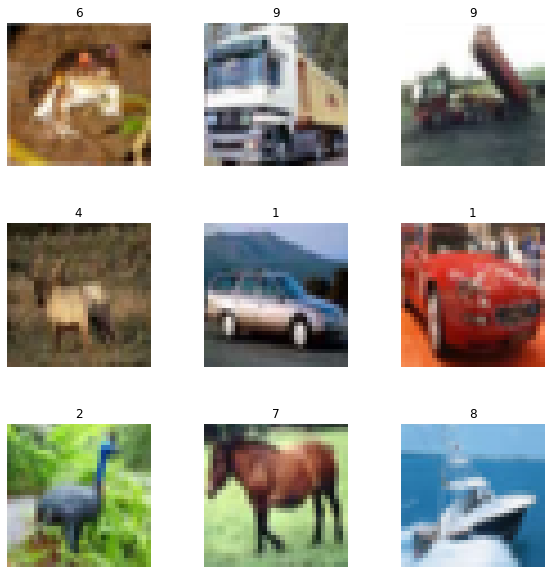

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# 载入 CIFAR-10 数据集
def load_cifar10_data(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# 将图像数据打印出来
def print_images(images, labels):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()
    for i in np.arange(0, 9):
        axes[i].imshow(images[i])
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.subplots_adjust(hspace=0.4) # 用于调整子图之间的间距和相对位置
    plt.show()

# 读取数据集
data_dict = load_cifar10_data('./data/cifar-10-batches-py/data_batch_1')

# 取出图像和标签数据
images = data_dict[b'data']
images = np.reshape(images, (10000, 3, 32, 32))
images = np.transpose(images, (0, 2, 3, 1))
labels = data_dict[b'labels']

# 打印前9张图像
print_images(images[:9], labels[:9])


# CIFAR10 数据增强后的图像打印

Files already downloaded and verified


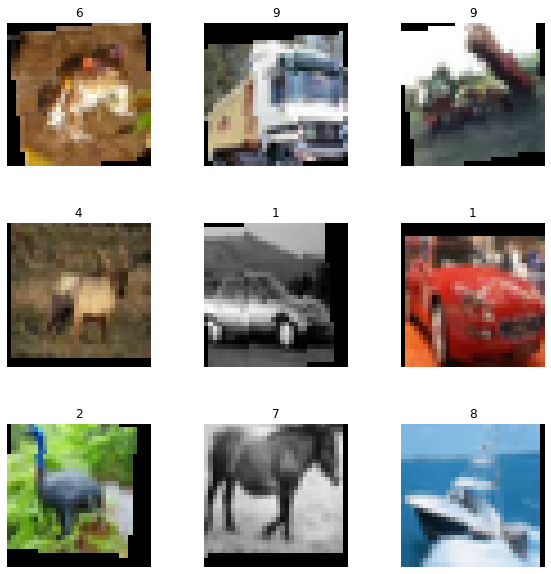

 frog truck truck  deer   car   car  bird horse  ship


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 定义数据增强函数
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomGrayscale(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 加载 CIFAR-10 数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=9, num_workers=2)

# 定义 CIFAR-10 的类别标签
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 将图像数据打印出来
def print_images(images, labels):
    images = images / 2 + 0.5 # 非标准化
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()
    for i in np.arange(0, 9):
        axes[i].imshow(np.transpose(images[i], (1, 2, 0))) # 将其维度调整为长×宽×通道
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.subplots_adjust(hspace=0.4) # 用于调整子图之间的间距和相对位置
    plt.show()

# 获取一个 batch 的图像和标签
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 将图像打印出来
# imshow(torchvision.utils.make_grid(images))
print_images(images.numpy(), labels.numpy())
# 打印标签
print(' '.join('%5s' % classes[labels[j]] for j in range(9)))


# STL10 原始图像打印

Files already downloaded and verified


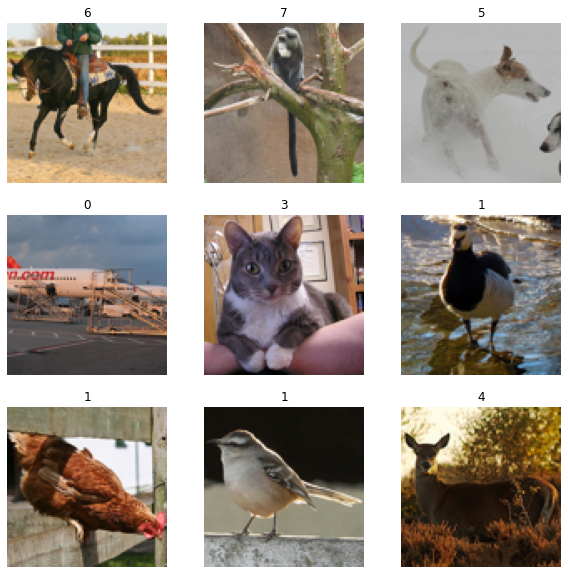

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor()

stl10_dataset = datasets.STL10(root='./data', split='test', download=True, transform=transform)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# 选择9个随机索引
idx = np.array(list(range(9)))

# 在子图中显示9张图像
for i, index in enumerate(idx):
    row = i // 3
    col = i % 3
    img, label = stl10_dataset[index]
    img = np.transpose(img.numpy(), (1, 2, 0))
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].set_title(label)

plt.show()

# STL10 数据增强后的图像打印

Files already downloaded and verified


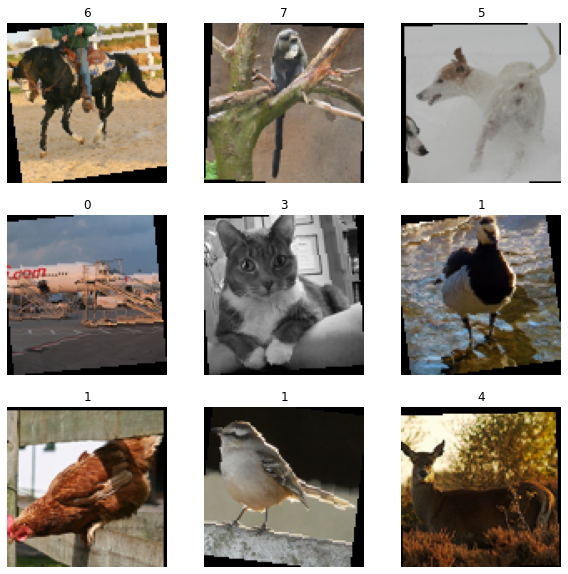

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.RandomCrop(96, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomGrayscale(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

stl10_dataset = datasets.STL10(root='./data', split='test', download=True, transform=transform)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# 选择9个随机索引
idx = np.array(list(range(9)))

# 在子图中显示9张图像
for i, index in enumerate(idx):
    row = i // 3
    col = i % 3
    img, label = stl10_dataset[index]
    img = img / 2 + 0.5
    img = np.transpose(img.numpy(), (1, 2, 0))
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].set_title(label)

plt.show()